### 1. Given two 1-d arrays of simulated values and observed values, Write a Pyhton function 

### to calculate the mean error, coefficient of determination and nash coefficient. Loops are NOT allowed.

In [1]:
from sklearn.metrics import r2_score
import numpy as np

sim = np.random.normal(size=100)
obs = np.random.normal(size=100)

def cal_stats(sim, obs):
    mean_error = np.mean(sim - obs)
    r2 = r2_score(obs, sim)
    nash = 1- sum((sim-obs))**2/sum((obs-np.mean(obs))**2)
    return mean_error, r2, nash

cal_stats(sim, obs)


(0.04752270892241794, -1.8990670284789455, 0.7174738976223225)

### 2. Given `x` and `y`, write a Python function to perform linear regression 

### which returns `a`, `c` and `sum of square errors` where `ax + c = y` 
```python
def linear_regression(x, y):
    
    return a, c, ssqe
```

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
x = np.random.normal(size=100).reshape((-1,1))
y = np.random.normal(size=100).reshape((-1,1))

def linear_regression(x, y):
    model = LinearRegression()  
    model.fit(x, y)
    model.coef_
    model.intercept_
    ypred=model.predict(x)
    ssqe = np.nansum((ypred - y) ** 2)
    return model.intercept_,model.coef_, ssqe

linear_regression(x,y)

(array([-0.02554579]), array([[0.15426348]]), 85.91996887000056)

### 3. Eestimate the mean precipitation on different land use types.

```python
landuse = np.random.randint(1, 5, [5, 5])
precip  = np.random.random([5, 5])

print('landuse\n', landuse)
print('precip \n', precip)
```



In [5]:
import numpy as np
import numpy.ma as ma

landuse = np.random.randint(1, 5, [5, 5])
precip  = np.random.random([5, 5])
print('landuse\n', landuse)
print('precip \n', precip)

def precip_landuse(landuse, precip):
    for i in np.unique(landuse):
        mask_precip = ma.masked_equal(landuse == i , precip)*precip
        mask_precip[mask_precip == 0] = np.nan
        mean = np.nanmean(mask_precip)
        print('landuse {}, {}'.format(i, mean))

precip_landuse(landuse, precip)

landuse
 [[4 3 4 1 3]
 [3 4 3 3 3]
 [4 1 4 3 4]
 [1 4 1 4 4]
 [4 2 1 2 2]]
precip 
 [[0.13956057 0.13170398 0.64879198 0.86610155 0.08358115]
 [0.45583411 0.96379207 0.61475809 0.96043678 0.21268919]
 [0.78333151 0.38791185 0.88954787 0.30928568 0.38204765]
 [0.87797658 0.22834222 0.88179052 0.30436437 0.3531927 ]
 [0.65574984 0.89077848 0.62114708 0.04568525 0.72361433]]
landuse 1, 0.726985514445117
landuse 2, 0.5533593527391808
landuse 3, 0.39546985482749075
landuse 4, 0.5348720779150672


### 4. We have two array. The first array is the distribution of irrigated land. 

### The second array is the precipitation. 

```python
landuse = np.random.randint(0, 1, [6, 6])
precip  = np.random.random([6, 6])

print('landuse\n', landuse)
print('precip \n', precip)
```

A. Create a function to create the buffer zones of varied distances to the irrigated land.

B. Calculate the mean precipitation in the buffer zones of different distance to the irrigated land.


landuse
 [[1 0 1 1 0 1]
 [1 1 1 0 1 1]
 [0 1 1 1 1 0]
 [0 0 1 0 1 1]
 [0 0 1 0 1 0]
 [0 1 0 1 1 1]]
precip 
 [[0.82206669 0.1772973  0.71554812 0.19513944 0.3825238  0.15615117]
 [0.03790047 0.29156669 0.4786294  0.85060319 0.36984696 0.36672524]
 [0.98600773 0.11066053 0.76710075 0.02706888 0.01608522 0.98654576]
 [0.17785347 0.87445072 0.41194891 0.25361201 0.28773077 0.4044735 ]
 [0.99095469 0.13856097 0.3722214  0.91659866 0.85251971 0.10793312]
 [0.80573076 0.79741788 0.52538301 0.39866006 0.83794545 0.26159857]]
0.0, 0.40813662890226365
1.0, 0.5837705848508413
1.4142135623730951, 0.5844040765232468


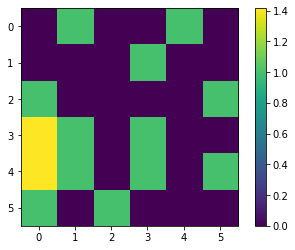

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
landuse = np.random.randint(0, 2, [6, 6])
precip  = np.random.random([6, 6])
plt.imshow(landuse)
plt.imshow(precip)

print('landuse\n', landuse)
print('precip \n', precip)
 
distance_x = np.arange(13).reshape([1, 13])
distance_y = np.arange(13).reshape([13, 1])
distance = np.sqrt((distance_x - 6) ** 2 + (distance_y - 6) ** 2) 
#plt.imshow(distance); plt.colorbar()    

def precip_landuse2(landuse, precip):
    for i in np.unique(landuse):
        mask_precip = ma.masked_equal(landuse == i , precip)*precip
        mask_precip[mask_precip == 0] = np.nan
        mean = np.nanmean(mask_precip)
        print('{}, {}'.format(i, mean))

def buffer(landuse, distance=distance):
    buf = np.full_like(landuse, 100000)
    n, m = buf.shape
    index = np.nonzero(landuse)
    for i, j in np.array(index).T:
        distance_buf = distance[(6-i):(6-i+n), (6-j):(6-j+m)]
        buf = np.where(distance_buf < buf, distance_buf, buf)
    return buf

buf = buffer(landuse)
plt.imshow(buf);plt.colorbar()
precip_landuse2(buf, precip)

### 5. Write a Python function to find the nearest point of a list of given points. 

### You are not allowed to use any type of loops.

e. g. points = [(3, 4), (1, 2), (7, 8), (9, 4), (6, 5), (8, 7), (4, 7)]

Hint: using numpy to create a N x N array which contain the distances between each ith an jth point pair; where N is the numer of points.

In [9]:
import numpy as np
points = [(3, 4), (1, 2), (7, 8), (9, 4), (6, 5), (8, 7), (4, 7)]

def find_nearest_points(listOfPoints):
    points = np.array(listOfPoints)
    distances = ((points.reshape(7, 1, 2) - points.reshape(1, 7, 2)) ** 2).sum(axis=2)
    distances[np.arange(7), np.arange(7)] = 100000
    min_dist = np.min(np.min(distances))
    nearest_points = np.where(distances==min_dist)
    print('The nearest points are {} and {}'.format(points[nearest_points[0][0]],points[nearest_points[0][1]]))

find_nearest_points(points)

The nearest points are [7 8] and [8 7]
